In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 76% 49.0M/64.4M [00:00<00:00, 97.9MB/s]
100% 64.4M/64.4M [00:00<00:00, 122MB/s] 


In [6]:
import zipfile
zipf=zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip','r')
zipf.extractall('/content')
zipf.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [10]:
#Normalizw
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
18/18 [==============================] - 7s 186ms/step - loss: 5.7132 - accuracy: 0.5601 - val_loss: 1.0831 - val_accuracy: 0.5143
Epoch 2/10
18/18 [==============================] - 4s 148ms/step - loss: 3.2370 - accuracy: 0.6409 - val_loss: 1.7645 - val_accuracy: 0.4857
Epoch 3/10
18/18 [==============================] - 5s 185ms/step - loss: 2.0751 - accuracy: 0.7235 - val_loss: 3.3040 - val_accuracy: 0.5286
Epoch 4/10
18/18 [==============================] - 4s 183ms/step - loss: 1.2474 - accuracy: 0.7917 - val_loss: 2.7139 - val_accuracy: 0.4857
Epoch 5/10
18/18 [==============================] - 4s 185ms/step - loss: 0.6848 - accuracy: 0.8689 - val_loss: 4.8059 - val_accuracy: 0.5214
Epoch 6/10
18/18 [==============================] - 5s 189ms/step - loss: 0.8819 - accuracy: 0.8761 - val_loss: 5.5268 - val_accuracy: 0.4929
Epoch 7/10
18/18 [==============================] - 4s 190ms/step - loss: 0.4097 - accuracy: 0.9264 - val_loss: 4.7547 - val_accuracy: 0.4786
Epoch 

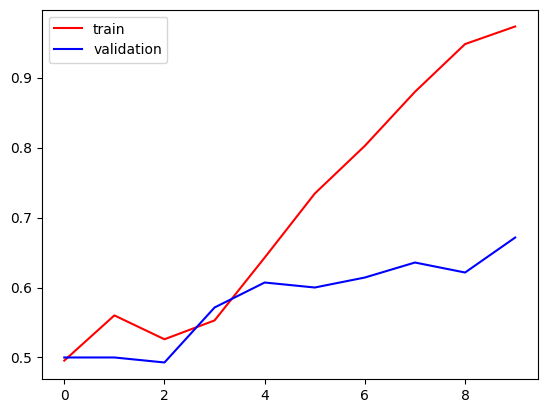

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

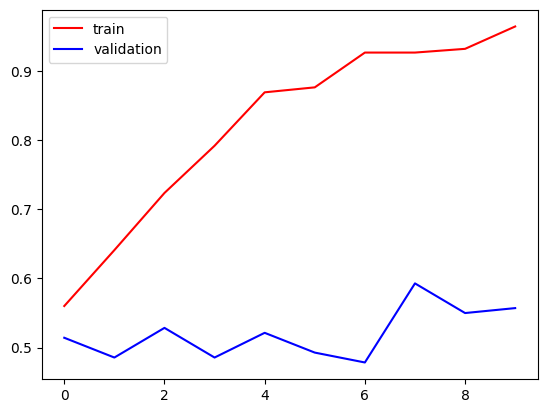

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

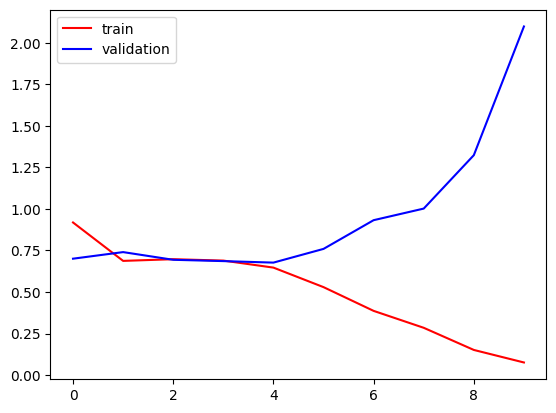

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

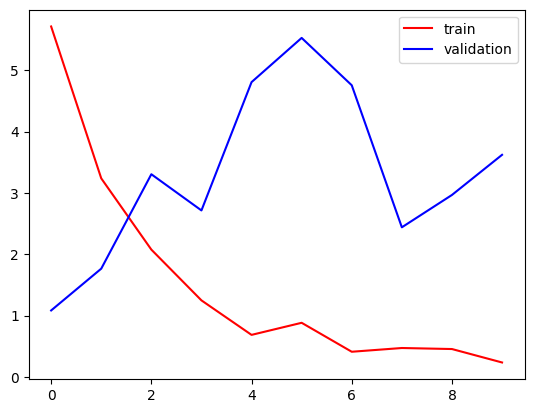

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()